In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
#from matplotlib impo

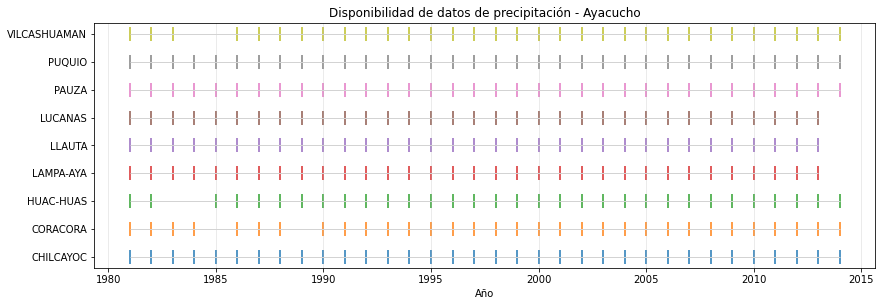

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# === Ruta principal ===
base_dir = "D:/S/SENAMHI PERU"

# === Funci√≥n para leer una estaci√≥n ===
def leer_estacion(file_path):
    year, month, day, prec = [], [], [], []
    with open(file_path, "r") as g:
        for line in g:
            s = line.strip().split()
            if len(s) >= 4:
                try:
                    y, m, d, p = int(s[0]), int(s[1]), int(s[2]), float(s[3])
                    if y >= 1981:  # solo desde 1981
                        if p == -99.9:  # NA en datos faltantes
                            p = None
                        year.append(y)
                        month.append(m)
                        day.append(d)
                        prec.append(p)
                except:
                    continue
    if not year:
        return None
    fechas = pd.to_datetime({"year": year, "month": month, "day": day}, errors="coerce")
    return pd.DataFrame({"Fecha": fechas, "prec": prec})

# === Graficar disponibilidad de datos en un departamento ===
def plot_disponibilidad(departamento):
    dept_path = os.path.join(base_dir, departamento)
    estaciones = [f for f in os.listdir(dept_path) if f.endswith(".txt")]
    
    plt.figure(figsize=(14, len(estaciones) * 0.5))
    
    for i, est in enumerate(estaciones):
        df = leer_estacion(os.path.join(dept_path, est))
        if df is not None:
            df["a√±o"] = df["Fecha"].dt.year
            # serie booleana: si ese a√±o tuvo datos v√°lidos
            disponibilidad = df.dropna().groupby("a√±o").size()
            a√±os = disponibilidad.index
            # Dibujamos l√≠nea horizontal para cada estaci√≥n
            plt.hlines(i, min(a√±os), max(a√±os), color="lightgray", linewidth=1)
            plt.scatter(a√±os, [i]*len(a√±os), marker="|", s=200, label=est.replace(".txt", ""))
    
    plt.yticks(range(len(estaciones)), [e.replace(".txt","") for e in estaciones])
    plt.xlabel("A√±o")
    plt.title(f"Disponibilidad de datos de precipitaci√≥n - {departamento}")
    plt.grid(axis="x", alpha=0.3)
    plt.show()

# === Ejemplo: San Martin ===
plot_disponibilidad("Ayacucho")


In [22]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# === Ruta principal ===
base_dir = "D:/S/SENAMHI PERU"

# === Funci√≥n para leer una estaci√≥n ===
def leer_estacion(file_path):
    year, month, day, prec = [], [], [], []
    with open(file_path, "r") as g:
        for line in g:
            s = line.strip().split()
            if len(s) >= 4:
                try:
                    y, m, d, p = int(s[0]), int(s[1]), int(s[2]), float(s[3])
                    if y >= 1981:
                        if p == -99.9:  # NA en datos faltantes
                            p = None
                        year.append(y)
                        month.append(m)
                        day.append(d)
                        prec.append(p)
                except:
                    continue
    if not year:
        return None
    fechas = pd.to_datetime({"year": year, "month": month, "day": day}, errors="coerce")
    return pd.DataFrame({"Fecha": fechas, "prec": prec})

# === Graficar disponibilidad con huecos visibles ===
def plot_disponibilidad(departamento):
    dept_path = os.path.join(base_dir, departamento)
    estaciones = [f for f in os.listdir(dept_path) if f.endswith(".txt")]
    
    resumen = []
    plt.figure(figsize=(14, len(estaciones) * 0.5))
    
    for i, est in enumerate(estaciones):
        df = leer_estacion(os.path.join(dept_path, est))
        if df is not None:
            df_valid = df.copy()
            df_valid["disp"] = df_valid["prec"].notna()  # True si hay dato
            
            if df_valid["disp"].any():
                inicio = df_valid.loc[df_valid["disp"], "Fecha"].min()
                fin = df_valid.loc[df_valid["disp"], "Fecha"].max()
                resumen.append([est.replace(".txt",""), inicio, fin])
                
                # --- dividir en bloques de datos continuos ---
                df_valid["gap"] = (df_valid["disp"] != df_valid["disp"].shift()).cumsum()
                bloques = df_valid[df_valid["disp"]].groupby("gap")
                
                for _, bloque in bloques:
                    plt.hlines(i, bloque["Fecha"].min(), bloque["Fecha"].max(),
                               colors="tab:blue", linewidth=3)
    
    # Etiquetas con nombre + fechas inicio-fin
    etiquetas = [
        f"{est} ({ini.date()} ‚Üí {fin.date()})"
        for est, ini, fin in resumen
    ]
    
    plt.yticks(range(len(etiquetas)), etiquetas)
    plt.xlabel("A√±o")
    plt.title(f"Disponibilidad de datos (con huecos) - {departamento}")
    plt.grid(axis="x", alpha=0.3)
    plt.tight_layout()
    plt.show()

# === Ejemplo: San Martin ===
plot_disponibilidad("Piura")


In [10]:
# === Graficar disponibilidad con huecos visibles ===
def plot_disponibilidad(departamento):
    dept_path = os.path.join(base_dir, departamento)
    estaciones = [f for f in os.listdir(dept_path) if f.endswith(".txt")]
    
    resumen = []
    plt.figure(figsize=(14, len(estaciones) * 0.5))
    
    for i, est in enumerate(estaciones):
        df = leer_estacion(os.path.join(dept_path, est))
        if df is not None:
            df_valid = df.copy()
            df_valid["disp"] = df_valid["prec"].notna()
            
            if df_valid["disp"].any():
                inicio = df_valid.loc[df_valid["disp"], "Fecha"].min()
                fin = df_valid.loc[df_valid["disp"], "Fecha"].max()
                resumen.append([est.replace(".txt",""), inicio, fin])
                
                # --- dividir en bloques de datos continuos ---
                df_valid["gap"] = (df_valid["disp"] != df_valid["disp"].shift()).cumsum()
                bloques = df_valid[df_valid["disp"]].groupby("gap")
                
                for _, bloque in bloques:
                    plt.hlines(i, bloque["Fecha"].min(), bloque["Fecha"].max(),
                               colors="tab:blue", linewidth=3)
    
    # Convertimos el resumen en DataFrame
    resumen_df = pd.DataFrame(resumen, columns=["Estacion", "Inicio", "Fin"])
    
    # --- Mostrar quienes no empiezan en 1981-01-01 ---
    fecha_ref = pd.Timestamp("1981-01-01")
    incompletas = resumen_df[resumen_df["Inicio"] > fecha_ref]
    if not incompletas.empty:
        print("‚ö†Ô∏è Estaciones que NO empiezan en 1981-01-01:")
        print(incompletas.to_string(index=False))
    else:
        print("‚úÖ Todas las estaciones empiezan en 1981-01-01")

    # Etiquetas en gr√°fico
    etiquetas = [
        f"{row.Estacion} ({row.Inicio.date()} ‚Üí {row.Fin.date()})"
        for row in resumen_df.itertuples()
    ]
    
    plt.yticks(range(len(etiquetas)), etiquetas)
    plt.xlabel("A√±o")
    plt.title(f"Disponibilidad de datos (con huecos) - {departamento}")
    plt.grid(axis="x", alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    #return resumen_df  # <--- lo devolvemos para an√°lisis posterior


‚ö†Ô∏è Estaciones que NO empiezan en 1981-01-01:
  Estacion     Inicio        Fin
POMACANCHI 1985-01-14 2014-06-30


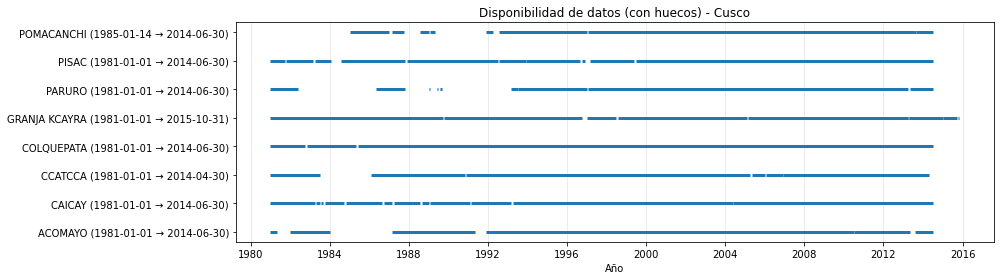

In [46]:
plot_disponibilidad("Cusco")

In [21]:
import os ###################### okkkkkkkkkkkkkk
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# === Ruta principal ===
base_dir = "D:/S/SENAMHI PERU"

# --- 1) Lectura de una estaci√≥n ---
def leer_estacion(file_path):
    year, month, day, prec = [], [], [], []
    with open(file_path, "r") as g:
        for line in g:
            s = line.strip().split()
            if len(s) >= 4:
                try:
                    y, m, d, p = int(s[0]), int(s[1]), int(s[2]), float(s[3])
                    if y >= 1981:
                        if p == -99.9:  # faltante
                            p = None
                        year.append(y); month.append(m); day.append(d); prec.append(p)
                except:
                    continue
    if not year:
        return None
    fechas = pd.to_datetime({"year": year, "month": month, "day": day}, errors="coerce")
    return pd.DataFrame({"Fecha": fechas, "prec": prec})

# --- 2) Cargar todas las estaciones de una regi√≥n ---
def cargar_region(region):
    region_dir = os.path.join(base_dir, region)
    estaciones = {}
    for root, _, files in os.walk(region_dir):
        for f in files:
            if f.lower().endswith(".txt"):
                est = os.path.splitext(f)[0].upper().strip()
                df = leer_estacion(os.path.join(root, f))
                if df is not None and "Fecha" in df.columns:
                    df = df.set_index("Fecha").sort_index()
                    estaciones[est] = df["prec"].astype(float)
    if not estaciones:
        raise RuntimeError(f"No se encontraron .txt v√°lidos en {region_dir}")
    
    fecha_min = pd.Timestamp("1981-01-01")
    fecha_max = max(s.index.max() for s in estaciones.values())
    fechas = pd.date_range(fecha_min, fecha_max, freq="D")
    df_region = pd.DataFrame({est: serie.reindex(fechas) for est, serie in estaciones.items()})
    df_region.index.name = "Fecha"
    return df_region

# --- 3) Selecci√≥n de vecinos confiables ---
def seleccionar_vecinos(df_region, est, min_corr=0.45, max_vecinos=5):
    fecha_inicio_ref = pd.Timestamp("1981-01-01")
    completos = [c for c in df_region.columns if c != est and df_region[c].first_valid_index() == fecha_inicio_ref]
    if not completos:
        return [], []

    y = df_region[est]
    corrs = []
    for c in completos:
        x = df_region[c]
        mask = y.notna() & x.notna()
        if mask.sum() >= 60:
            r = np.corrcoef(y[mask], x[mask])[0, 1]
            if np.isfinite(r):
                corrs.append((c, r))

    corrs = sorted(corrs, key=lambda t: t[1], reverse=True)
    vecinos = [c for c, r in corrs if r >= min_corr][:max_vecinos]
    if not vecinos and corrs:
        vecinos = [c for c, _ in corrs[:max_vecinos]]

    return vecinos, corrs

# --- 4) Completar tramo pre-inicio ---
def completar_pre_inicio(df_region, est, vecinos, corrs_vecinos=None, min_train=10):
    y = df_region[est].copy()
    primer_real = y.dropna().index.min()
    if pd.isna(primer_real) or primer_real <= pd.Timestamp("1981-01-01"):
        return y.fillna(-99.9), pd.DataFrame(), 0, primer_real

    fechas = pd.date_range(pd.Timestamp("1981-01-01"), primer_real, freq="D")
    y = y.reindex(fechas)
    fill_idx = pd.date_range(pd.Timestamp("1981-01-01"), primer_real - pd.Timedelta(days=1), freq="D")
    y_hat = pd.Series(index=fill_idx, dtype=float)

    for mes in range(1, 13):
        idx_mes = fill_idx[fill_idx.month == mes]
        if len(idx_mes) == 0: continue

        idx_mes_full = y.index[y.index.month == mes]
        X_mes_full = df_region.loc[idx_mes_full, vecinos]
        y_mes_full = y.loc[idx_mes_full]

        mask_fit = y_mes_full.notna() & X_mes_full.notna().all(axis=1)
        if mask_fit.sum() >= min_train:
            model = LinearRegression()
            model.fit(X_mes_full[mask_fit], y_mes_full[mask_fit])
            X_pred = df_region.loc[idx_mes, vecinos]
            mask_pred = X_pred.notna().all(axis=1)
            if mask_pred.any():
                y_hat.loc[idx_mes[mask_pred]] = model.predict(X_pred[mask_pred])

        # fallback promedio
        faltan = y_hat.loc[idx_mes].isna()
        if faltan.any():
            X_pred_any = df_region.loc[idx_mes, vecinos]
            y_hat.loc[idx_mes[faltan]] = X_pred_any.mean(axis=1).loc[idx_mes[faltan]]

    y_hat = y_hat.clip(lower=0)
    y_final = y.copy()
    y_final.loc[y_hat.index] = y_hat

    # Log de vecinos con correlaci√≥n
    if corrs_vecinos is not None:
        resumen_vecinos = pd.DataFrame({
            "Estacion_incompleta": est,
            "Inicio": primer_real,
            "Vecino": [v for v, r in corrs_vecinos if v in vecinos],
            "Correlacion": [r for v, r in corrs_vecinos if v in vecinos]
        })
    else:
        resumen_vecinos = pd.DataFrame()

    return y_final, resumen_vecinos, int(y_hat.notna().sum()), primer_real

# --- 5) Orquestador ---
# --- 5) Orquestador con guardado CSV ---
def completar_region_preinicio(region, min_corr=0.45, max_vecinos=5):
    df_region = cargar_region(region)
    print(f"‚úÖ {region}: {len(df_region.columns)} estaciones cargadas.")

    fecha_ref = pd.Timestamp("1981-01-01")
    incompletas = {col: df_region[col].dropna().index.min()
                   for col in df_region.columns
                   if (df_region[col].dropna().index.min() is not None) and (df_region[col].dropna().index.min() > fecha_ref)}

    if not incompletas:
        print("üéâ Todas las estaciones inician en 1981-01-01. Nada que completar.")
        return

    print("üìå Estaciones a completar (pre-inicio):")
    for est, ini in incompletas.items():
        print(f"   - {est}: primer dato real = {ini.date()}")

    out_dir = os.path.join(base_dir, region, "Completadas_preinicio")
    os.makedirs(out_dir, exist_ok=True)

    for est in incompletas:
        vecinos, corrs = seleccionar_vecinos(df_region, est, min_corr=min_corr, max_vecinos=max_vecinos)
        serie, resumen_vecinos, nfill, primer_real = completar_pre_inicio(
            df_region, est, vecinos[:max_vecinos], corrs_vecinos=corrs
        )

        # Reindex completo desde 1981-01-01 hasta √∫ltimo dato real
        ultimo_real = df_region[est].dropna().index.max()
        fechas_full = pd.date_range("1981-01-01", ultimo_real, freq="D")
        serie_full = serie.reindex(fechas_full)
        serie_full.loc[primer_real:] = df_region[est].loc[primer_real:ultimo_real]

        # Reemplazar NaN por -99.0
        serie_full = serie_full.fillna(-99.9)

        # Guardar CSV
        serie_full.to_csv(
            os.path.join(out_dir, f"{est}_preinicio_completado.csv"),
            header=[est],
            index_label="Fecha",
            float_format="%.1f"
        )

        print(f"‚úÖ {est}: {nfill} d√≠as completados hasta {primer_real.date()} con vecinos {vecinos}")

        if not resumen_vecinos.empty:
            print("\nResumen de vecinos y correlaciones:")
            print(resumen_vecinos.to_string(index=False))

# --- EJECUCI√ìN ---
completar_region_preinicio("Cusco", min_corr=0.45, max_vecinos=5)


‚úÖ Cusco: 8 estaciones cargadas.
üìå Estaciones a completar (pre-inicio):
   - POMACANCHI: primer dato real = 1985-01-14
‚úÖ POMACANCHI: 1474 d√≠as completados hasta 1985-01-14 con vecinos ['ACOMAYO', 'PARURO', 'GRANJA KCAYRA']

Resumen de vecinos y correlaciones:
Estacion_incompleta     Inicio        Vecino  Correlacion
         POMACANCHI 1985-01-14       ACOMAYO     0.634547
         POMACANCHI 1985-01-14        PARURO     0.580689
         POMACANCHI 1985-01-14 GRANJA KCAYRA     0.459874


In [2]:
import os ##################### Obs OKKKKKKKKKKKKKK cmhyd
import pandas as pd
import shutil

# --- Rutas ---
base_dir = r"D:/S/SENAMHI PERU"
region = "Cusco"
region_dir = os.path.join(base_dir, region)
output_dir = "D:/S/CMhyd/Cusco/Obs" # Carpeta nueva
os.makedirs(output_dir, exist_ok=True)

# --- Leer info de estaciones ---
stations_csv = os.path.join(base_dir, "Stations Senamhi.csv")
ubicaciones_df = pd.read_csv(stations_csv, encoding="latin1")
ubicaciones_df = ubicaciones_df.rename(columns={"Stations":"NAME","Lat":"LAT","Lon":"LONG","dem":"ELEVATION"})

# --- Detectar estaciones completadas ---
completadas_dir = os.path.join(region_dir, "Completadas_preinicio")
completadas = [f.replace("_preinicio_completado.csv","") for f in os.listdir(completadas_dir) if f.endswith(".csv")]

# --- Listar todas las estaciones dentro de la carpeta Cusco (txt originales) ---
originales = [os.path.splitext(f)[0] for f in os.listdir(region_dir) if f.lower().endswith(".txt")]

# --- Unir todas las estaciones ---
todas_estaciones = sorted(list(set(originales + completadas)))

# --- Filtrar info de ubicaciones ---
ubicaciones_df = ubicaciones_df[ubicaciones_df["NAME"].isin(todas_estaciones)]

# --- Crear Cusco.txt con info de estaciones ---
cusco_txt_path = os.path.join(output_dir, "Cusco.txt")
with open(cusco_txt_path, "w") as f:
    f.write("ID,NAME,LAT,LONG,ELEVATION\n")
    for i, row in enumerate(ubicaciones_df.itertuples(), 1):
        f.write(f"{i},{row.NAME},{row.LAT},{row.LONG},{row.ELEVATION}\n")

# --- Funci√≥n para copiar archivo original tal cual ---
def copiar_txt_original(original_txt, destino_txt):
    shutil.copy(original_txt, destino_txt)

# --- Crear archivos .txt por estaci√≥n (modificado) ---
for est in todas_estaciones:
    completado_csv = os.path.join(completadas_dir, f"{est}_preinicio_completado.csv")
    
    if os.path.exists(completado_csv):
        # Si existe CSV completado, se puede usar igual que antes
        df = pd.read_csv(completado_csv, index_col=0, parse_dates=True)
        serie = df[est].copy()
        # Redondear a 2 decimales si quieres
        serie = serie.round(2)
    else:
        # Leer el archivo original de la estaci√≥n
        original_txt = None
        for f in os.listdir(region_dir):
            if f.lower().startswith(est.lower()) and f.lower().endswith(".txt"):
                original_txt = os.path.join(region_dir, f)
                break
        if original_txt is None:
            continue
        
        # Leer solo columna de precipitaci√≥n desde 1981
        precs = []
        with open(original_txt, "r") as g:
            for line in g:
                s = line.strip().split()
                if len(s) >= 4:
                    year, month, day = int(s[0]), int(s[1]), int(s[2])
                    fecha = pd.Timestamp(year, month, day)
                    if fecha >= pd.Timestamp("1981-01-01"):
                        try:
                            p = float(s[3])
                            precs.append(p)
                        except:
                            continue
        serie = pd.Series(precs)

    # Guardar archivo .txt
    txt_path = os.path.join(output_dir, f"{est.upper()}.txt")
    with open(txt_path, "w") as f:
        f.write("19810101\n")  # primera l√≠nea
        for val in serie:
            f.write(f"{val}\n")


print(f"‚úÖ Carpeta {output_dir} creada con Cusco.txt y archivos TXT de todas las estaciones (sin modificar).")


‚úÖ Carpeta D:/S/CMhyd/Cusco/Obs creada con Cusco.txt y archivos TXT de todas las estaciones (sin modificar).


In [16]:
import os #############  Obs ok qmap
import pandas as pd

# --- Rutas ---
base_dir = r"D:/S/SENAMHI PERU"
region = "Cusco"
region_dir = os.path.join(base_dir, region)
completadas_dir = os.path.join(region_dir, "Completadas_preinicio")

# --- Leer info de estaciones ---
stations_csv = os.path.join(base_dir, "Stations Senamhi.csv")
ubicaciones_df = pd.read_csv(stations_csv, encoding="latin1")
ubicaciones_df = ubicaciones_df.rename(columns={"Stations":"NAME","Lat":"LAT","Lon":"LONG","dem":"ELEVATION"})

# --- Detectar estaciones ---
completadas = [f.replace("_preinicio_completado.csv","") for f in os.listdir(completadas_dir) if f.endswith(".csv")]
originales = [os.path.splitext(f)[0] for f in os.listdir(region_dir) if f.lower().endswith(".txt")]
todas_estaciones = sorted(list(set(originales + completadas)))

# --- Crear diccionario para guardar series ---
series_dict = {}

for est in todas_estaciones:
    completado_csv = os.path.join(completadas_dir, f"{est}_preinicio_completado.csv")
    
    if os.path.exists(completado_csv):
        df = pd.read_csv(completado_csv, index_col=0, parse_dates=True)
        serie = df[est].copy()
    else:
        # Leer archivo .txt original
        original_txt = None
        for f in os.listdir(region_dir):
            if f.lower().startswith(est.lower()) and f.lower().endswith(".txt"):
                original_txt = os.path.join(region_dir, f)
                break
        if original_txt is None:
            continue
        
        fechas, precs = [], []
        with open(original_txt, "r") as g:
            for line in g:
                s = line.strip().split()
                if len(s) >= 4:
                    year, month, day = int(s[0]), int(s[1]), int(s[2])
                    fecha = pd.Timestamp(year, month, day)
                    if fecha >= pd.Timestamp("1981-01-01"):
                        try:
                            precs.append(float(s[3]))
                            fechas.append(fecha)
                        except:
                            continue
        serie = pd.Series(precs, index=fechas)
    
    series_dict[est] = serie.round(2)

# --- Agrupar estaciones por su fecha final ---
fechas_finales = {est: series_dict[est].dropna().index.max().date() for est in series_dict}
df_fechas = pd.DataFrame(list(fechas_finales.items()), columns=["Estacion","Fecha_fin"])

for fecha_fin, grupo in df_fechas.groupby("Fecha_fin"):
    estaciones_grupo = grupo["Estacion"].tolist()
    
    # Combinar solo las estaciones de este grupo
    df_all = pd.DataFrame({est: series_dict[est] for est in estaciones_grupo}).sort_index()
    df_all.index.name = "Fecha"

    # --- Reorganizar fechas en formato d/m/Y ---
    df_all.reset_index(inplace=True)
    df_all["Fecha"] = df_all["Fecha"].dt.strftime("%#m/%#d/%Y")

    # --- Preparar encabezado con lat/lon ---
    latitudes = [ubicaciones_df.loc[ubicaciones_df["NAME"] == est, "LAT"].values[0] for est in df_all.columns if est != "Fecha"]
    longitudes = [ubicaciones_df.loc[ubicaciones_df["NAME"] == est, "LONG"].values[0] for est in df_all.columns if est != "Fecha"]

    header_lat = pd.DataFrame([["N"] + latitudes], columns=df_all.columns)
    header_lon = pd.DataFrame([["E"] + longitudes], columns=df_all.columns)

    # --- Concatenar encabezados + datos ---
    df_out = pd.concat([header_lat, header_lon, df_all], ignore_index=True)

    # --- Guardar CSV por grupo ---
    obs_dir = r"D:/S/CMhyd/Cusco/Obs"
    output_csv = os.path.join(obs_dir, f"{region}_Qmap_until_{fecha_fin}.csv")
    df_out.to_csv(output_csv, index=False, header=False)

    print(f"‚úÖ Guardado: {output_csv}")


‚úÖ Guardado: D:/S/SENAMHI PERU\Cusco\Cusco_Qmap_until_2014-06-30.csv
‚úÖ Guardado: D:/S/SENAMHI PERU\Cusco\Cusco_Qmap_until_2015-10-31.csv


In [17]:
import os ####################### see time of end 
import pandas as pd

base_dir = "D:/S/SENAMHI PERU"
region = "Cusco"

# --- Funci√≥n para leer estaci√≥n normal ---
def leer_estacion(file_path):
    year, month, day, prec = [], [], [], []
    with open(file_path, "r") as g:
        for line in g:
            s = line.strip().split()
            if len(s) >= 4:
                try:
                    y, m, d, p = int(s[0]), int(s[1]), int(s[2]), float(s[3])
                    if y >= 1981:
                        if p == -99.9:
                            p = None
                        year.append(y)
                        month.append(m)
                        day.append(d)
                        prec.append(p)
                except:
                    continue
    if not year:
        return None
    fechas = pd.to_datetime({"year": year, "month": month, "day": day})
    return pd.DataFrame({"Fecha": fechas, "prec": prec})

# --- Leer preinicio completado (si existe) ---
preinicio_dir = os.path.join(base_dir, region, "Completadas_preinicio")
preinicio_df = pd.DataFrame()
if os.path.exists(preinicio_dir):
    archivos = [f for f in os.listdir(preinicio_dir) if f.endswith("_preinicio_completado.csv")]
    for f in archivos:
        df = pd.read_csv(os.path.join(preinicio_dir, f), parse_dates=["Fecha"])
        est_name = f.replace("_preinicio_completado.csv", "")
        df = df.set_index("Fecha")
        preinicio_df[est_name] = df[est_name]

# --- Funci√≥n para obtener duraci√≥n de cada estaci√≥n ---
def duracion_estaciones(region):
    dept_path = os.path.join(base_dir, region)
    estaciones = [f for f in os.listdir(dept_path) if f.endswith(".txt")]
    
    resumen = []
    for est in estaciones:
        est_name = est.replace(".txt", "")
        df = leer_estacion(os.path.join(dept_path, est))
        if df is None:
            continue
        
        # Si tiene preinicio completado
        if est_name in preinicio_df.columns:
            serie = preinicio_df[est_name]
            if not serie.empty:
                inicio = serie.index.min()
            else:
                inicio = df["Fecha"].min()
        else:
            inicio = df["Fecha"].min()
        
        # üëá Ahora fin es simplemente la √∫ltima fecha disponible en el archivo
        fin = df["Fecha"].max()
        
        resumen.append([est_name, inicio, fin])
    
    return pd.DataFrame(resumen, columns=["Estacion", "Fecha_inicio", "Fecha_fin"])

# --- Ejecutar ---
df_duracion = duracion_estaciones(region)
print(df_duracion)


        Estacion Fecha_inicio  Fecha_fin
0        ACOMAYO   1981-01-01 2014-06-30
1         CAICAY   1981-01-01 2014-06-30
2        CCATCCA   1981-01-01 2014-06-30
3     COLQUEPATA   1981-01-01 2014-06-30
4  GRANJA KCAYRA   1981-01-01 2015-10-31
5         PARURO   1981-01-01 2014-06-30
6          PISAC   1981-01-01 2014-06-30
7     POMACANCHI   1981-01-01 2014-06-30


In [3]:
import xarray as xr ########  Download prec, tmax and tmin of grilled data PISCO 
import pandas as pd

# === Rango de coordenadas para todo el Per√∫ ===
longitudes = ['-81.35', '-68.65']  # Oeste a Este
latitudes  = ['-18.35', '-0.05']   # Sur a Norte

# === Funci√≥n para abrir y procesar un dataset PISCO ===
def load_pisco_dataset(var_url, var_name):
    url = f"""{var_url}\
X/{longitudes[0]}/{longitudes[1]}/RANGEEDGES/\
Y/{latitudes[0]}/{latitudes[1]}/RANGEEDGES/\
dods"""

    ds = xr.open_dataset(url, decode_times=False)
    ds = xr.decode_cf(ds, decode_times=True)
    ds = ds.rename({
        'T': 'time',
        'X': 'lon',
        'Y': 'lat'
    })
    ds['time'] = pd.to_datetime(ds['time'].values.astype(str), yearfirst=True)

    # Cambiar el nombre de la variable interna al que queremos
    var_original = list(ds.data_vars)[0]
    ds = ds.rename({var_original: var_name})

    return ds

# === URLs base para cada variable ===
url_prec_base = "https://iridl.ldeo.columbia.edu/SOURCES/.SENAMHI/.HSR/.PISCO/.Prec/.v2p1/.stable/.daily/.Prec/"
url_tmax_base = "https://iridl.ldeo.columbia.edu/SOURCES/.SENAMHI/.HSR/.PISCO/.Temp/.v1p1/.tmax/.stable/.daily/.tmax/"
url_tmin_base = "https://iridl.ldeo.columbia.edu/SOURCES/.SENAMHI/.HSR/.PISCO/.Temp/.v1p1/.tmin/.stable/.daily/.tmin/"

# === Cargar datasets ===
print("Cargando precipitaci√≥n...")
ds_prec = load_pisco_dataset(url_prec_base, "prec")

print("Cargando Tmax...")
ds_tmax = load_pisco_dataset(url_tmax_base, "tmax")

print("Cargando Tmin...")
ds_tmin = load_pisco_dataset(url_tmin_base, "tmin")

# === Ver en Jupyter antes de guardar ===
print("\n--- Precipitaci√≥n ---")
display(ds_prec)

print("\n--- Tmax ---")
display(ds_tmax)

print("\n--- Tmin ---")
display(ds_tmin)

# === Combinar en un solo Dataset ===
#ds_all = xr.me

Cargando precipitaci√≥n...
Cargando Tmax...
Cargando Tmin...

--- Precipitaci√≥n ---


<xarray.Dataset>
Dimensions:  (time: 13149, lon: 127, lat: 184)
Coordinates:
  * time     (time) datetime64[ns] 1981-01-01T12:00:00 ... 2016-12-31T12:00:00
  * lon      (lon) float32 -81.25 -81.15 -81.05 -80.95 ... -68.85 -68.75 -68.65
  * lat      (lat) float32 -18.35 -18.25 -18.15 -18.05 ... -0.25 -0.15 -0.05
Data variables:
    prec     (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL


--- Tmax ---


<xarray.Dataset>
Dimensions:  (time: 13149, lon: 128, lat: 184)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-01 1960-01-01 ... 1960-01-01
  * lon      (lon) float32 -81.35 -81.25 -81.15 -81.05 ... -68.85 -68.75 -68.65
  * lat      (lat) float32 -18.35 -18.25 -18.15 -18.05 ... -0.25 -0.15 -0.05
Data variables:
    tmax     (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL


--- Tmin ---


<xarray.Dataset>
Dimensions:  (time: 13149, lon: 128, lat: 184)
Coordinates:
  * time     (time) datetime64[ns] 1981-01-01T12:00:00 ... 2016-12-31T12:00:00
  * lon      (lon) float32 -81.35 -81.25 -81.15 -81.05 ... -68.85 -68.75 -68.65
  * lat      (lat) float32 -18.35 -18.25 -18.15 -18.05 ... -0.25 -0.15 -0.05
Data variables:
    tmin     (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL

In [4]:
import polars as pl  #!pip install polars

# Try reading with Latin-1 encoding (Windows default)
ubicaciones_df = pl.read_csv(
    "D:/S/SENAMHI PERU/Stations Senamhi.csv", 
    encoding="latin1"
)[["Stations", "Lat", "Lon"]]

# Convert to list of dictionaries
locs = ubicaciones_df.to_dicts()

# Preview the first few locations
print(locs[:5])

[{'Stations': 'CABANILLAS', 'Lat': -15.16, 'Lon': -70.0}, {'Stations': 'CA√ëETE', 'Lat': -13.07, 'Lon': -76.3}, {'Stations': 'CHOTANO LAJAS', 'Lat': -6.56, 'Lon': -78.7}, {'Stations': 'LA CASCARILLA', 'Lat': -5.66, 'Lon': -78.9}, {'Stations': '√ëA√ëA', 'Lat': -11.99, 'Lon': -76.9}]


In [5]:
# === Supongamos que ya tienes cargados ds_prec, ds_tmax, ds_tmin ===
prec = xr.Dataset()

for l in locs:
    nombre = l['Stations']
    lon = l['Lon']
    lat = l['Lat']

    # --- Precipitaci√≥n ---
    ds_prec_sel = ds_prec.sel(lon=lon, lat=lat, method='nearest')
    ds_prec_sel.attrs[f"{nombre}_lon"] = float(ds_prec_sel.lon.values)
    ds_prec_sel.attrs[f"{nombre}_lat"] = float(ds_prec_sel.lat.values)
    ds_prec_sel = ds_prec_sel.rename({"prec": nombre}).drop_vars(["lat", "lon"])
    prec = xr.merge([prec, ds_prec_sel], compat="override")

# Si luego quieres guardar comprimido:
# prec.to_netcdf("prec_estaciones.nc", encoding={v: {"zlib": True, "complevel": 4} for v in prec.data_vars})
prec.data_vars


Data variables:
    CABANILLAS                  (time) float32 ...
    CA√ëETE                      (time) float32 ...
    CHOTANO LAJAS               (time) float32 ...
    LA CASCARILLA               (time) float32 ...
    √ëA√ëA                        (time) float32 ...
    HUANGACOCHA                 (time) float32 ...
    AYAVIRI-PUN                 (time) float32 ...
    MU√ëANI                      (time) float32 ...
    FRANCISCO DE ORELLANA       (time) float32 ...
    MANITI                      (time) float32 ...
    BELLAVISTA                  (time) float32 ...
    CHILCAYOC                   (time) float32 ...
    PAUZA                       (time) float32 ...
    PAMPA BLANCA-ARE            (time) float32 ...
    CAPACHICA                   (time) float32 ...
    PAMPAHUTA                   (time) float32 ...
    LAMPA                       (time) float32 ...
    CARAVELI                    (time) float32 ...
    YANAQUIHUA                  (time) float32 ...
    LAMPA-A

In [6]:
import pandas as pd     #### it may take a few minutes
# Crear diccionarios base
prec_df_dict = {}
# --- Precipitaci√≥n ---
for var_name in prec.data_vars:
    serie = prec[var_name].to_series()
    df = serie.to_frame(name='prec')
    prec_df_dict[var_name.strip()] = df

In [20]:
prec_df_dict['EL PINTOR']

prec
time                         
1981-01-01 12:00:00  0.023738
1981-01-02 12:00:00  0.906146
1981-01-03 12:00:00  1.185733
1981-01-04 12:00:00  0.059542
1981-01-05 12:00:00  0.000000
...                       ...
2016-12-27 12:00:00  1.372402
2016-12-28 12:00:00  2.860460
2016-12-29 12:00:00  1.118405
2016-12-30 12:00:00  1.158374
2016-12-31 12:00:00  6.496796

[13149 rows x 1 columns]

In [19]:
import os ################### hist and future qmap
import pandas as pd

# --- Rutas / insumos ---
base_dir = r"D:/S/SENAMHI PERU"
historical_dir = r"D:/S/CMhyd/Cusco/historical"
future_dir     = r"D:/S/CMhyd/Cusco/future"
os.makedirs(historical_dir, exist_ok=True)
os.makedirs(future_dir, exist_ok=True)

# --- Ubicaciones ---
stations_csv = os.path.join(base_dir, "Stations Senamhi.csv")
ubicaciones_df = pd.read_csv(stations_csv, encoding="latin1")
ubicaciones_df = ubicaciones_df.rename(columns={"Stations":"NAME","Lat":"LAT","Lon":"LONG","dem":"ELEVATION"})
ubicaciones_df["KEY"] = ubicaciones_df["NAME"].str.strip().str.upper()
lat_map  = dict(zip(ubicaciones_df["KEY"], ubicaciones_df["LAT"]))
lon_map  = dict(zip(ubicaciones_df["KEY"], ubicaciones_df["LONG"]))

# --- Helpers ---
def fmt_dates(idx):
    return pd.to_datetime(idx).strftime("%#d/%#m/%Y")  # Windows style

def build_consolidated_csv(df_all, out_path):
    if df_all.empty:
        return
    stations_order = list(df_all.columns)
    df_all = df_all.apply(lambda s: s.round(2))
    date_str = fmt_dates(df_all.index)
    df_all = df_all.copy()
    df_all.insert(0, "", date_str)
    lats = [lat_map.get(est.strip().upper(), "") for est in stations_order]
    lons = [lon_map.get(est.strip().upper(), "") for est in stations_order]
    header_lat = pd.DataFrame([["N"] + lats], columns=[""] + stations_order)
    header_lon = pd.DataFrame([["E"] + lons], columns=[""] + stations_order)
    out = pd.concat([header_lat, header_lon, df_all], axis=0, ignore_index=True)
    out.to_csv(out_path, index=False, header=False)

# --- Agrupamos por fecha final ---
for fecha_fin, grupo in df_duracion.groupby("Fecha_fin"):
    fecha_fin = pd.to_datetime(fecha_fin).date()
    df_hist_all = pd.DataFrame()
    df_fut_all  = pd.DataFrame()

    for _, row in grupo.iterrows():
        estacion = str(row['Estacion'])
        fi = pd.to_datetime(row['Fecha_inicio']).date()
        ff = fecha_fin

        estacion_key = estacion.strip().upper()
        df_prec = None
        for k in prec_df_dict.keys():
            if k.strip().upper() == estacion_key:
                df_prec = prec_df_dict[k].copy()
                break
        if df_prec is None:
            print(f"‚ö†Ô∏è Estaci√≥n no encontrada: {estacion}")
            continue

        df_prec.index = pd.to_datetime(df_prec.index).date
        serie = df_prec.iloc[:, 0]
        serie.name = estacion

        # Historical
        hist = serie.loc[(serie.index >= fi) & (serie.index <= ff)]
        if not hist.empty:
            df_hist_all = pd.concat([df_hist_all, pd.Series(hist.values, index=pd.to_datetime(hist.index), name=estacion)], axis=1)

        # Future
        fut = serie.loc[(serie.index > ff)]
        if not fut.empty:
            df_fut_all = pd.concat([df_fut_all, pd.Series(fut.values, index=pd.to_datetime(fut.index), name=estacion)], axis=1)

    # Exportar archivos por grupo
    hist_file = os.path.join(historical_dir, f"Cusco_historical_until_{fecha_fin}.csv")
    fut_file  = os.path.join(future_dir, f"Cusco_future_from_{fecha_fin + pd.Timedelta(days=1)}.csv")
    build_consolidated_csv(df_hist_all, hist_file)
    build_consolidated_csv(df_fut_all, fut_file)

    print(f"‚úÖ Guardado grupo con fecha fin {fecha_fin}")
    print(f"   Historical: {hist_file}")
    print(f"   Future:     {fut_file}")


‚úÖ Guardado grupo con fecha fin 2014-06-30
   Historical: D:/S/CMhyd/Cusco/historical\Cusco_historical_until_2014-06-30.csv
   Future:     D:/S/CMhyd/Cusco/future\Cusco_future_from_2014-07-01.csv
‚úÖ Guardado grupo con fecha fin 2015-10-31
   Historical: D:/S/CMhyd/Cusco/historical\Cusco_historical_until_2015-10-31.csv
   Future:     D:/S/CMhyd/Cusco/future\Cusco_future_from_2015-11-01.csv


In [25]:
import os ########################### Historical and Future cmhyd
import pandas as pd

historical_dir = r"D:/S/CMhyd/Cusco/historical"
future_dir = r"D:/S/CMhyd/Cusco/future"

os.makedirs(historical_dir, exist_ok=True)
os.makedirs(future_dir, exist_ok=True)

for idx, row in df_duracion.iterrows():
    estacion = row['Estacion']
    fecha_inicio = pd.to_datetime(row['Fecha_inicio']).date()
    fecha_fin = pd.to_datetime(row['Fecha_fin']).date()
    
    estacion_key = estacion.strip().upper()
    df_prec = None
    for k in prec_df_dict.keys():
        if k.strip().upper() == estacion_key:
            df_prec = prec_df_dict[k].copy()
            break

    if df_prec is None:
        print(f"‚ö†Ô∏è Estaci√≥n {estacion} no encontrada en diccionario")
        continue
    
    df_prec.index = pd.to_datetime(df_prec.index).date
    serie = df_prec.iloc[:,0]  # tomar la primera columna
    
    # --- Historical ---
    hist = serie.loc[(serie.index >= fecha_inicio) & (serie.index <= fecha_fin)]
    if not hist.empty:
        hist_file = os.path.join(historical_dir, f"{estacion}.txt")
        with open(hist_file, "w") as f:
            f.write(fecha_inicio.strftime("%Y%m%d") + "\n")
            for val in hist:
                f.write(f"{val:.2f}\n")  # <- Aqu√≠ se asegura 2 decimales
    
    # --- Future ---
    fut = serie.loc[serie.index > fecha_fin]
    if not fut.empty:
        fut_file = os.path.join(future_dir, f"{estacion}.txt")
        with open(fut_file, "w") as f:
            f.write((fecha_fin + pd.Timedelta(days=1)).strftime("%Y%m%d") + "\n")
            for val in fut:
                f.write(f"{val:.2f}\n")  # <- 2 decimales


In [26]:
import os
import shutil

# --- Rutas ---
input_file = r"D:\S\CMhyd\Cusco\Obs\Cusco.txt"
historical_dir = r"D:\S\CMhyd\Cusco\historical"
future_dir = r"D:\S\CMhyd\Cusco\future"

# --- Crear carpetas si no existen ---
os.makedirs(historical_dir, exist_ok=True)
os.makedirs(future_dir, exist_ok=True)

# --- Copiar archivo ---
shutil.copy(input_file, os.path.join(historical_dir, "Cusco.txt"))
shutil.copy(input_file, os.path.join(future_dir, "Cusco.txt"))

print("Archivo copiado correctamente a historical y future.")


Archivo copiado correctamente a historical y future.


In [2]:
################################################# Download Senamhi stations for a defined time #########
import os
import pandas as pd

# Tu funci√≥n process_station
def process_station(file_path, start='1981-01-01', end='2015-12-31'): # time
    date_range = pd.date_range(start=start, end=end, freq='D')
    final_df = pd.DataFrame(index=date_range)
    final_df.index.name = 'date'
    final_df['prec'] = -99.9
    final_df['tmax'] = -99.9
    final_df['tmin'] = -99.9

    with open(file_path, 'r') as f:
        years, months, days = [], [], []
        precs, tmaxs, tmins = [], [], []
        for line in f:
            parts = line.strip().split()
            years.append(int(parts[0]))
            months.append(int(parts[1]))
            days.append(int(parts[2]))
            precs.append(float(parts[3]))
            tmaxs.append(float(parts[4]))
            tmins.append(float(parts[5]))

    data = pd.DataFrame({
        'year': years,
        'month': months,
        'day': days,
        'prec': precs,
        'tmax': tmaxs,
        'tmin': tmins
    })

    data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
    data = data.set_index('date')
    data = data[['prec', 'tmax', 'tmin']]
    final_df.update(data)

    return final_df

# === Files ===
input_root = "D:/S/SENAMHI PERU"
output_root = "D:/S//OUTPUT_CSV_SENAMHI_corrg"  # Puedes cambiar a donde quieras guardar

# === Recorrer todos los departamentos y estaciones ===
for dept in os.listdir(input_root):
    dept_path = os.path.join(input_root, dept)
    if os.path.isdir(dept_path):
        for filename in os.listdir(dept_path):
            if filename.endswith(".txt"):
                file_path = os.path.join(dept_path, filename)
                print(f"Procesando: {file_path}")

                # Procesar estaci√≥n
                df = process_station(file_path)

                # Crear carpeta de salida si no existe
                output_dir = os.path.join(output_root, dept)
                os.makedirs(output_dir, exist_ok=True)

                # Guardar CSV con mismo nombre de estaci√≥n
                output_file = os.path.join(output_dir, filename.replace('.txt', '.csv'))
                df.to_csv(output_file)

Procesando: D:/S/SENAMHI PERU\Amazonas\EL PINTOR.txt
Procesando: D:/S/SENAMHI PERU\Amazonas\MAGUNCHAL.txt
Procesando: D:/S/SENAMHI PERU\Ancash\BUENA VISTA.txt
Procesando: D:/S/SENAMHI PERU\Ancash\CHACCHAN.txt
Procesando: D:/S/SENAMHI PERU\Ancash\MAYORARCA.txt
Procesando: D:/S/SENAMHI PERU\Ancash\MILPO.txt
Procesando: D:/S/SENAMHI PERU\Ancash\OCROS.txt
Procesando: D:/S/SENAMHI PERU\Ancash\PIRA.txt
Procesando: D:/S/SENAMHI PERU\Ancash\RECUAY.txt
Procesando: D:/S/SENAMHI PERU\Ancash\SIHUAS.txt
Procesando: D:/S/SENAMHI PERU\Apurimac\CURAHUASI.txt
Procesando: D:/S/SENAMHI PERU\Arequipa\ANDAHUA.txt
Procesando: D:/S/SENAMHI PERU\Arequipa\APLAO.txt
Procesando: D:/S/SENAMHI PERU\Arequipa\AYO.txt
Procesando: D:/S/SENAMHI PERU\Arequipa\CARAVELI.txt
Procesando: D:/S/SENAMHI PERU\Arequipa\CHACHAS.txt
Procesando: D:/S/SENAMHI PERU\Arequipa\CHICHAS.txt
Procesando: D:/S/SENAMHI PERU\Arequipa\CHIGUATA.txt
Procesando: D:/S/SENAMHI PERU\Arequipa\CHIVAY.txt
Procesando: D:/S/SENAMHI PERU\Arequipa\CHOCO.txt

In [17]:
import os
import pandas as pd

# === Directorios ===
input_root = "D:/S/OUTPUT_CSV_SENAMHI_corrg"  # Donde guardaste los CSV de estaciones
output_root = "D:/S/OUTPUT_FACTORES_SENAMHI"  # Nueva carpeta para los factores
os.makedirs(output_root, exist_ok=True)

# Lista para acumular factores
factores = []

# === Funci√≥n para arreglar nombres mal decodificados (√É‚Äò -> √ë, etc.) ===
def fix_encoding(text):
    try:
        return text.encode("latin1").decode("utf-8")
    except:
        return text

# === Recorrer subcarpetas (departamentos) ===
for dept in os.listdir(input_root):
    dept_path = os.path.join(input_root, dept)
    if os.path.isdir(dept_path):
        for filename in os.listdir(dept_path):
            if filename.endswith(".csv"):
                file_path = os.path.join(dept_path, filename)
                print(f"Procesando: {file_path}")

                # Leer estaci√≥n con encoding forzado
                df = pd.read_csv(file_path, encoding="latin1")

                # Nombre de estaci√≥n (desde archivo sin extensi√≥n, pero arreglado)
                estacion_name = fix_encoding(filename.replace(".csv", ""))

                # Filtrar datos v√°lidos
                df_prec = df[df['prec'] != -99.9]
                #df_tmax = df[df['tmax'] != -99.9]
                #df_tmin = df[df['tmin'] != -99.9]

                # Calcular promedios (si no hay datos v√°lidos -> None)
                promedio_prec = df_prec['prec'].mean() if not df_prec.empty else None
                #promedio_tmax = df_tmax['tmax'].mean() if not df_tmax.empty else None
                #promedio_tmin = df_tmin['tmin'].mean() if not df_tmin.empty else None

                # Guardar registro
                factores.append({
                    "departamento": dept,
                    "estacion": estacion_name,
                    "promedio_prec": promedio_prec,
                    #"promedio_tmax": promedio_tmax,
                    #"promedio_tmin": promedio_tmin
                })

# === Crear DataFrame con todos los factores ===
factores_df = pd.DataFrame(factores)

# Guardar CSV con los factores
output_file = os.path.join(output_root, "factores_estaciones.csv")
factores_df.to_csv(output_file, index=False, encoding="utf-8-sig")  # UTF-8 con BOM para Excel

print(f"\n‚úÖ Factores (prec, tmax, tmin) guardados en: {output_file} con nombres corregidos")


Procesando: D:/S/OUTPUT_CSV_SENAMHI_corrg\Amazonas\EL PINTOR.csv
Procesando: D:/S/OUTPUT_CSV_SENAMHI_corrg\Amazonas\MAGUNCHAL.csv
Procesando: D:/S/OUTPUT_CSV_SENAMHI_corrg\Ancash\BUENA VISTA.csv
Procesando: D:/S/OUTPUT_CSV_SENAMHI_corrg\Ancash\CHACCHAN.csv
Procesando: D:/S/OUTPUT_CSV_SENAMHI_corrg\Ancash\MAYORARCA.csv
Procesando: D:/S/OUTPUT_CSV_SENAMHI_corrg\Ancash\MILPO.csv
Procesando: D:/S/OUTPUT_CSV_SENAMHI_corrg\Ancash\OCROS.csv
Procesando: D:/S/OUTPUT_CSV_SENAMHI_corrg\Ancash\PIRA.csv
Procesando: D:/S/OUTPUT_CSV_SENAMHI_corrg\Ancash\RECUAY.csv
Procesando: D:/S/OUTPUT_CSV_SENAMHI_corrg\Ancash\SIHUAS.csv
Procesando: D:/S/OUTPUT_CSV_SENAMHI_corrg\Apurimac\CURAHUASI.csv
Procesando: D:/S/OUTPUT_CSV_SENAMHI_corrg\Arequipa\ANDAHUA.csv
Procesando: D:/S/OUTPUT_CSV_SENAMHI_corrg\Arequipa\APLAO.csv
Procesando: D:/S/OUTPUT_CSV_SENAMHI_corrg\Arequipa\AYO.csv
Procesando: D:/S/OUTPUT_CSV_SENAMHI_corrg\Arequipa\CARAVELI.csv
Procesando: D:/S/OUTPUT_CSV_SENAMHI_corrg\Arequipa\CHACHAS.csv
Procesand

In [12]:
import xarray as xr ########  Download prec, tmax and tmin of grilled data PISCO 
import pandas as pd

# === Rango de coordenadas para todo el Per√∫ ===
longitudes = ['-81.35', '-68.65']  # Oeste a Este
latitudes  = ['-18.35', '-0.05']   # Sur a Norte

# === Funci√≥n para abrir y procesar un dataset PISCO ===
def load_pisco_dataset(var_url, var_name):
    url = f"""{var_url}\
X/{longitudes[0]}/{longitudes[1]}/RANGEEDGES/\
Y/{latitudes[0]}/{latitudes[1]}/RANGEEDGES/\
dods"""

    ds = xr.open_dataset(url, decode_times=False)
    ds = xr.decode_cf(ds, decode_times=True)
    ds = ds.rename({
        'T': 'time',
        'X': 'lon',
        'Y': 'lat'
    })
    ds['time'] = pd.to_datetime(ds['time'].values.astype(str), yearfirst=True)

    # Cambiar el nombre de la variable interna al que queremos
    var_original = list(ds.data_vars)[0]
    ds = ds.rename({var_original: var_name})

    return ds

# === URLs base para cada variable ===
url_prec_base = "https://iridl.ldeo.columbia.edu/SOURCES/.SENAMHI/.HSR/.PISCO/.Prec/.v2p1/.stable/.daily/.Prec/"
url_tmax_base = "https://iridl.ldeo.columbia.edu/SOURCES/.SENAMHI/.HSR/.PISCO/.Temp/.v1p1/.tmax/.stable/.daily/.tmax/"
url_tmin_base = "https://iridl.ldeo.columbia.edu/SOURCES/.SENAMHI/.HSR/.PISCO/.Temp/.v1p1/.tmin/.stable/.daily/.tmin/"

# === Cargar datasets ===
print("Cargando precipitaci√≥n...")
ds_prec = load_pisco_dataset(url_prec_base, "prec")

print("Cargando Tmax...")
ds_tmax = load_pisco_dataset(url_tmax_base, "tmax")

print("Cargando Tmin...")
ds_tmin = load_pisco_dataset(url_tmin_base, "tmin")

# === Ver en Jupyter antes de guardar ===
print("\n--- Precipitaci√≥n ---")
display(ds_prec)

print("\n--- Tmax ---")
display(ds_tmax)

print("\n--- Tmin ---")
display(ds_tmin)

# === Combinar en un solo Dataset ===
#ds_all = xr.merge([ds_prec, ds_tmax, ds_tmin]) # of small area

#print("\n--- Dataset combinado ---")
#display(ds_all)

# Si luego quieres guardar:
# ds_all.to_netcdf("pisco_peru.nc")

Cargando precipitaci√≥n...
Cargando Tmax...
Cargando Tmin...

--- Precipitaci√≥n ---


<xarray.Dataset>
Dimensions:  (time: 13149, lon: 127, lat: 184)
Coordinates:
  * time     (time) datetime64[ns] 1981-01-01T12:00:00 ... 2016-12-31T12:00:00
  * lon      (lon) float32 -81.25 -81.15 -81.05 -80.95 ... -68.85 -68.75 -68.65
  * lat      (lat) float32 -18.35 -18.25 -18.15 -18.05 ... -0.25 -0.15 -0.05
Data variables:
    prec     (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL


--- Tmax ---


<xarray.Dataset>
Dimensions:  (time: 13149, lon: 128, lat: 184)
Coordinates:
  * time     (time) datetime64[ns] 1981-01-01T12:00:00 ... 2016-12-31T12:00:00
  * lon      (lon) float32 -81.35 -81.25 -81.15 -81.05 ... -68.85 -68.75 -68.65
  * lat      (lat) float32 -18.35 -18.25 -18.15 -18.05 ... -0.25 -0.15 -0.05
Data variables:
    tmax     (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL


--- Tmin ---


<xarray.Dataset>
Dimensions:  (time: 13149, lon: 128, lat: 184)
Coordinates:
  * time     (time) datetime64[ns] 1981-01-01T12:00:00 ... 2016-12-31T12:00:00
  * lon      (lon) float32 -81.35 -81.25 -81.15 -81.05 ... -68.85 -68.75 -68.65
  * lat      (lat) float32 -18.35 -18.25 -18.15 -18.05 ... -0.25 -0.15 -0.05
Data variables:
    tmin     (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL

In [3]:
import polars as pl  #!pip install polars

# Try reading with Latin-1 encoding (Windows default)
ubicaciones_df = pl.read_csv(
    "D:/S/SENAMHI PERU/Stations Senamhi.csv", 
    encoding="latin1"
)[["Stations", "Lat", "Lon"]]

# Convert to list of dictionaries
locs = ubicaciones_df.to_dicts()

# Preview the first few locations
print(locs[:5])

[{'Stations': 'CABANILLAS', 'Lat': -15.16, 'Lon': -70.0}, {'Stations': 'CA√ëETE', 'Lat': -13.07, 'Lon': -76.3}, {'Stations': 'CHOTANO LAJAS', 'Lat': -6.56, 'Lon': -78.7}, {'Stations': 'LA CASCARILLA', 'Lat': -5.66, 'Lon': -78.9}, {'Stations': '√ëA√ëA', 'Lat': -11.99, 'Lon': -76.9}]


In [4]:
# === Supongamos que ya tienes cargados ds_prec, ds_tmax, ds_tmin ===
prec = xr.Dataset()
tmax = xr.Dataset()
tmin = xr.Dataset()

for l in locs:
    nombre = l['Stations']
    lon = l['Lon']
    lat = l['Lat']

    # --- Precipitaci√≥n ---
    ds_prec_sel = ds_prec.sel(lon=lon, lat=lat, method='nearest')
    ds_prec_sel.attrs[f"{nombre}_lon"] = float(ds_prec_sel.lon.values)
    ds_prec_sel.attrs[f"{nombre}_lat"] = float(ds_prec_sel.lat.values)
    ds_prec_sel = ds_prec_sel.rename({"prec": nombre}).drop_vars(["lat", "lon"])
    prec = xr.merge([prec, ds_prec_sel], compat="override")

    # --- Tmax ---
    ds_tmax_sel = ds_tmax.sel(lon=lon, lat=lat, method='nearest')
    ds_tmax_sel.attrs[f"{nombre}_lon"] = float(ds_tmax_sel.lon.values)
    ds_tmax_sel.attrs[f"{nombre}_lat"] = float(ds_tmax_sel.lat.values)
    ds_tmax_sel = ds_tmax_sel.rename({"tmax": nombre}).drop_vars(["lat", "lon"])
    tmax = xr.merge([tmax, ds_tmax_sel], compat="override")

    # --- Tmin ---
    ds_tmin_sel = ds_tmin.sel(lon=lon, lat=lat, method='nearest')
    ds_tmin_sel.attrs[f"{nombre}_lon"] = float(ds_tmin_sel.lon.values)
    ds_tmin_sel.attrs[f"{nombre}_lat"] = float(ds_tmin_sel.lat.values)
    ds_tmin_sel = ds_tmin_sel.rename({"tmin": nombre}).drop_vars(["lat", "lon"])
    tmin = xr.merge([tmin, ds_tmin_sel], compat="override")

# Si luego quieres guardar comprimido:
# prec.to_netcdf("prec_estaciones.nc", encoding={v: {"zlib": True, "complevel": 4} for v in prec.data_vars})
prec.data_vars

Data variables:
    CABANILLAS                  (time) float32 ...
    CA√ëETE                      (time) float32 ...
    CHOTANO LAJAS               (time) float32 ...
    LA CASCARILLA               (time) float32 ...
    √ëA√ëA                        (time) float32 ...
    HUANGACOCHA                 (time) float32 ...
    AYAVIRI-PUN                 (time) float32 ...
    MU√ëANI                      (time) float32 ...
    FRANCISCO DE ORELLANA       (time) float32 ...
    MANITI                      (time) float32 ...
    BELLAVISTA                  (time) float32 ...
    CHILCAYOC                   (time) float32 ...
    PAUZA                       (time) float32 ...
    PAMPA BLANCA-ARE            (time) float32 ...
    CAPACHICA                   (time) float32 ...
    PAMPAHUTA                   (time) float32 ...
    LAMPA                       (time) float32 ...
    CARAVELI                    (time) float32 ...
    YANAQUIHUA                  (time) float32 ...
    LAMPA-A

In [29]:
import pandas as pd     #### it may take a few minutes

# === Diccionario final ===
clima_df_dict = {}

# Crear diccionarios base
prec_df_dict = {}
tmax_df_dict = {}
tmin_df_dict = {}

# --- Precipitaci√≥n ---
for var_name in prec.data_vars:
    serie = prec[var_name].to_series()
    df = serie.to_frame(name='prec')
    prec_df_dict[var_name.strip()] = df

# --- Tmax ---
for var_name in tmax.data_vars:
    serie = tmax[var_name].to_series()
    df = serie.to_frame(name='tmax')
    tmax_df_dict[var_name.strip()] = df

# --- Tmin ---
for var_name in tmin.data_vars:
    serie = tmin[var_name].to_series()
    df = serie.to_frame(name='tmin')
    tmin_df_dict[var_name.strip()] = df

# --- Unir los tres en un solo diccionario ---
for estacion in prec_df_dict.keys():
    df_prec = prec_df_dict[estacion]
    df_tmax = tmax_df_dict.get(estacion, pd.DataFrame())
    df_tmin = tmin_df_dict.get(estacion, pd.DataFrame())

    # Unir por √≠ndice (tiempo)
    df_merged = df_prec.join(df_tmax, how="outer").join(df_tmin, how="outer")

    clima_df_dict[estacion] = df_merged

# clima_df_dict ahora tiene un DataFrame por estaci√≥n con columnas: prec, tmax, tmin
#clima_df_dict['NOMBRE_ESTACION']

In [39]:
prec_df_dict['EL PINTOR']

In [6]:
clima_df_dict['LOMAS DE LACHAY']

prec       tmax       tmin
time                                               
1981-01-01 12:00:00  0.006526  24.741425  14.449268
1981-01-02 12:00:00  0.018746  25.795872  14.790736
1981-01-03 12:00:00  0.000000  24.870714  15.788437
1981-01-04 12:00:00  0.000000  24.007114  15.993378
1981-01-05 12:00:00  0.000000  24.188253  16.062469
...                       ...        ...        ...
2016-12-27 12:00:00  0.000000  23.773602  15.141025
2016-12-28 12:00:00  0.046240  23.093645  16.404392
2016-12-29 12:00:00  0.000454  23.596045  16.220774
2016-12-30 12:00:00  0.000000  22.973665  16.714375
2016-12-31 12:00:00  0.033788  21.955002  17.083244

[13149 rows x 3 columns]

In [18]:
import os
import pandas as pd

# === Rutas ===
factores_obs_file = "D:/S/OUTPUT_FACTORES_SENAMHI/factores_estaciones.csv"
output_file = "D:/S/OUTPUT_FACTORES_SENAMHI/factores_vs_pisco.csv"

# === Funci√≥n para arreglar nombres mal decodificados (√É‚Äò -> √ë, etc.) ===
def fix_encoding(text):
    try:
        return text.encode("latin1").decode("utf-8")
    except:
        return text

# === Cargar promedios observados ===
obs_df = pd.read_csv(factores_obs_file, encoding="utf-8-sig")
# Corregir nombres de estaciones
obs_df["estacion_fixed"] = obs_df["estacion"].apply(lambda x: fix_encoding(str(x)).strip().upper())

# Definir rango v√°lido (igual al de observaciones)
start_date = "1981-01-01"
end_date   = "2015-12-31"

# Lista para guardar resultados
resultados = []

# === Recorrer estaciones en clima_df_dict (PISCO) ===
for estacion, df in clima_df_dict.items():
    # Arreglar nombre de estaci√≥n desde PISCO
    estacion_fixed = fix_encoding(str(estacion)).strip().upper()

    # Asegurar que el √≠ndice sea datetime
    df = df.copy()
    df.index = pd.to_datetime(df.index)

    # Filtrar solo 1981‚Äì2015
    df_periodo = df.loc[start_date:end_date]

    # Calcular promedios PISCO solo en ese rango
    promedio_pisco_prec = df_periodo['prec'].mean(skipna=True)
    #promedio_pisco_tmax = df_periodo['tmax'].mean(skipna=True)
    #promedio_pisco_tmin = df_periodo['tmin'].mean(skipna=True)

    # Buscar observados correspondientes usando estacion_fixed
    obs_row = obs_df[obs_df['estacion_fixed'] == estacion_fixed]

    if not obs_row.empty:
        promedio_obs_prec = obs_row['promedio_prec'].values[0]
        #promedio_obs_tmax = obs_row['promedio_tmax'].values[0]
        #promedio_obs_tmin = obs_row['promedio_tmin'].values[0]

        # Calcular factores (evitar divisi√≥n por cero)
        factor_prec = promedio_obs_prec / promedio_pisco_prec if promedio_pisco_prec and promedio_pisco_prec != 0 else None
        #factor_tmax = promedio_obs_tmax / promedio_pisco_tmax if promedio_pisco_tmax and promedio_pisco_tmax != 0 else None
        #factor_tmin = promedio_obs_tmin / promedio_pisco_tmin if promedio_pisco_tmin and promedio_pisco_tmin != 0 else None

        resultados.append({
            "estacion": fix_encoding(estacion),  # nombre original corregido
            "promedio_obs_prec": promedio_obs_prec,
            "promedio_pisco_prec": promedio_pisco_prec,
            "factor_prec": factor_prec,
            #"promedio_obs_tmax": promedio_obs_tmax,
            #"promedio_pisco_tmax": promedio_pisco_tmax,
            #"factor_tmax": factor_tmax,
            #"promedio_obs_tmin": promedio_obs_tmin,
            #"promedio_pisco_tmin": promedio_pisco_tmin,
            #"factor_tmin": factor_tmin
        })

# === Convertir a DataFrame y redondear a 2 decimales ===
factores_final_df = pd.DataFrame(resultados).round(2)

# Guardar CSV con 2 decimales y UTF-8 con BOM para que Excel muestre √ë correctamente
factores_final_df.to_csv(output_file, index=False, float_format="%.2f", encoding="utf-8-sig")

print(f"\n‚úÖ Factores PISCO vs Observado guardados en: {output_file} (1981‚Äì2015, con 2 decimales y nombres corregidos)")



‚úÖ Factores PISCO vs Observado guardados en: D:/S/OUTPUT_FACTORES_SENAMHI/factores_vs_pisco.csv (1981‚Äì2015, con 2 decimales y nombres corregidos)


In [24]:
import pandas as pd

# === Rutas ===
factores_file = "D:/S/OUTPUT_FACTORES_SENAMHI/factores_vs_pisco.csv"

# === Cargar factores ===
factores_df = pd.read_csv(factores_file, encoding="utf-8-sig")

# Diccionario para guardar datos corregidos
clima_df_corr = {}  

# === Recorrer estaciones de clima_df_dict ===
for estacion, df in clima_df_dict .items(): # clima_df_dict ( of prec, tmax and tmin)
    df_corr = df.copy()

    # Buscar factores de esa estaci√≥n
    row = factores_df[factores_df["estacion"].str.upper() == estacion.upper()]

    if not row.empty:
        factor_prec = row["factor_prec"].values[0]
        # factor_tmax = row["factor_tmax"].values[0]
        # factor_tmin = row["factor_tmin"].values[0]

        # ‚úÖ Aplicar correcci√≥n SOLO a prec
        if pd.notna(factor_prec):
            df_corr["prec"] = df_corr["prec"] * factor_prec

        # Si luego quieres habilitar para temperaturas, descomenta:
        # if pd.notna(factor_tmax):
        #     df_corr["tmax"] = df_corr["tmax"] * factor_tmax
        # if pd.notna(factor_tmin):
        #     df_corr["tmin"] = df_corr["tmin"] * factor_tmin

        print(f"‚úÖ Estaci√≥n {estacion}: factor_prec aplicado ({factor_prec})")
    else:
        print(f"‚ö†Ô∏è Estaci√≥n {estacion} no encontrada en factores, se deja sin correcci√≥n.")

    # Guardar estaci√≥n corregida
    clima_df_corr[estacion] = df_corr

# === Ahora clima_df_corr contiene los datos corregidos SOLO en precipitaci√≥n ===

In [31]:
import os############ solo para prec
import pandas as pd

# === Rutas ===
factores_file = "D:/S/OUTPUT_FACTORES_SENAMHI/factores_vs_pisco.csv"

# === Cargar factores ===
factores_df = pd.read_csv(factores_file, encoding="utf-8-sig")

# Diccionario para guardar datos corregidos
prec_df_corr = {}  

# === Recorrer estaciones de prec_df_dict ===
for estacion, df in prec_df_dict.items():  
    df_corr = df.copy()

    # Buscar factores de esa estaci√≥n (coincidencia insensible a may√∫sculas)
    row = factores_df[factores_df["estacion"].str.upper() == estacion.upper()]

    if not row.empty:
        factor_prec = row["factor_prec"].values[0]

        # ‚úÖ Aplicar correcci√≥n SOLO a prec
        if pd.notna(factor_prec):
            df_corr["prec"] = df_corr["prec"] * factor_prec
            print(f"‚úÖ Estaci√≥n {estacion}: factor_prec aplicado ({factor_prec})")
    else:
        print(f"‚ö†Ô∏è Estaci√≥n {estacion} no encontrada en factores, se deja sin correcci√≥n.")

    # Guardar en el diccionario corregido
    prec_df_corr[estacion] = df_corr


‚úÖ Estaci√≥n CABANILLAS: factor_prec aplicado (1.07)
‚úÖ Estaci√≥n CA√ëETE: factor_prec aplicado (2.86)
‚úÖ Estaci√≥n CHOTANO LAJAS: factor_prec aplicado (1.1)
‚úÖ Estaci√≥n LA CASCARILLA: factor_prec aplicado (2.46)
‚úÖ Estaci√≥n √ëA√ëA: factor_prec aplicado (0.47)
‚úÖ Estaci√≥n HUANGACOCHA: factor_prec aplicado (4.25)
‚úÖ Estaci√≥n AYAVIRI-PUN: factor_prec aplicado (1.01)
‚úÖ Estaci√≥n MU√ëANI: factor_prec aplicado (1.01)
‚úÖ Estaci√≥n FRANCISCO DE ORELLANA: factor_prec aplicado (1.55)
‚úÖ Estaci√≥n MANITI: factor_prec aplicado (1.36)
‚úÖ Estaci√≥n BELLAVISTA: factor_prec aplicado (1.14)
‚úÖ Estaci√≥n CHILCAYOC: factor_prec aplicado (1.68)
‚úÖ Estaci√≥n PAUZA: factor_prec aplicado (1.17)
‚úÖ Estaci√≥n PAMPA BLANCA-ARE: factor_prec aplicado (3.4)
‚úÖ Estaci√≥n CAPACHICA: factor_prec aplicado (0.87)
‚úÖ Estaci√≥n PAMPAHUTA: factor_prec aplicado (1.03)
‚úÖ Estaci√≥n LAMPA: factor_prec aplicado (1.2)
‚úÖ Estaci√≥n CARAVELI: factor_prec aplicado (1.2)
‚úÖ Estaci√≥n YANAQUIHUA: factor_pre

In [37]:
prec_df_corr['EL PINTOR']
# Seleccionar la estaci√≥n
df_el_pintor = prec_df_corr["EL PINTOR"]

# Exportar a CSV
df_el_pintor.to_csv("D:/S/EL_PINTOR_prec.csv", float_format="%.2f")

print("‚úÖ Archivo exportado: D:/S/EL_PINTOR_prec.csv")


‚úÖ Archivo exportado: D:/S/EL_PINTOR_prec.csv


In [35]:
################################# Complete the missing data Senamhi with PISCO data (prec, tmax, tmin) ##############################
import os
import pandas as pd
from pathlib import Path

# Rutas base
input_base = Path("D:/S/OUTPUT_CSV_SENAMHI_corrg")
output_base = Path("D:/S/OUTPUT_CSV_SENAMHI_NC_corr")

# Normalizar fechas en diccionarios
for dic in (prec_df_corr, tmax_df_dict, tmin_df_dict):
    for key in dic:
        df = dic[key]
        df.index = df.index.normalize()
        dic[key] = df

# Procesar cada archivo CSV
for dept_path in input_base.iterdir():
    if dept_path.is_dir():
        dept_name = dept_path.name
        for station_file in dept_path.glob("*.csv"):
            station_name = station_file.stem
            print(f"Procesando: {dept_name}/{station_name}")

            # Leer CSV original
            df_csv = pd.read_csv(station_file, index_col=0, parse_dates=True)

            # Verificar si la estaci√≥n existe en los datos de NetCDF
            if (
                station_name in prec_df_corr
                and station_name in tmax_df_dict
                and station_name in tmin_df_dict
            ):
                df_prec_nc = prec_df_corr[station_name]
                df_tmax_nc = tmax_df_dict[station_name]
                df_tmin_nc = tmin_df_dict[station_name]

                # Asegurarse de que las fechas coincidan
                common_dates = df_csv.index.intersection(df_prec_nc.index)

                # --- Reemplazar PREC ---
                df_csv.loc[common_dates, "prec"] = df_csv.loc[common_dates, "prec"].mask(
                    df_csv.loc[common_dates, "prec"] == -99.9,
                    df_prec_nc.loc[common_dates, "prec"].round(1)
                )

                # --- Reemplazar TMAX ---
                if "tmax" in df_csv.columns:
                    df_csv.loc[common_dates, "tmax"] = df_csv.loc[common_dates, "tmax"].mask(
                        df_csv.loc[common_dates, "tmax"] == -99.9,
                        df_tmax_nc.loc[common_dates, "tmax"].round(1)
                    )

                # --- Reemplazar TMIN ---
                if "tmin" in df_csv.columns:
                    df_csv.loc[common_dates, "tmin"] = df_csv.loc[common_dates, "tmin"].mask(
                        df_csv.loc[common_dates, "tmin"] == -99.9,
                        df_tmin_nc.loc[common_dates, "tmin"].round(1)
                    )

                # Guardar en carpeta de salida
                output_dept_dir = output_base / dept_name
                output_dept_dir.mkdir(parents=True, exist_ok=True)
                output_path = output_dept_dir / f"{station_name}.csv"
                df_csv.to_csv(output_path)

            else:
                print(f"‚ö†Ô∏è Estaci√≥n no encontrada en NetCDF: {station_name}")


Procesando: Amazonas/EL PINTOR
Procesando: Amazonas/MAGUNCHAL
Procesando: Ancash/BUENA VISTA
Procesando: Ancash/CHACCHAN
Procesando: Ancash/MAYORARCA
Procesando: Ancash/MILPO
Procesando: Ancash/OCROS
Procesando: Ancash/PIRA
Procesando: Ancash/RECUAY
Procesando: Ancash/SIHUAS
Procesando: Apurimac/CURAHUASI
Procesando: Arequipa/ANDAHUA
Procesando: Arequipa/APLAO
Procesando: Arequipa/AYO
Procesando: Arequipa/CARAVELI
Procesando: Arequipa/CHACHAS
Procesando: Arequipa/CHICHAS
Procesando: Arequipa/CHIGUATA
Procesando: Arequipa/CHIVAY
Procesando: Arequipa/CHOCO
Procesando: Arequipa/COTAHUASI
Procesando: Arequipa/EL FRAYLE
Procesando: Arequipa/HUAMBO
Procesando: Arequipa/IMATA
Procesando: Arequipa/LA ANGOSTURA
Procesando: Arequipa/LA JOYA
Procesando: Arequipa/LA PAMPILLA
Procesando: Arequipa/LAS SALINAS
Procesando: Arequipa/MACHAGUAY
Procesando: Arequipa/MADRIGAL
Procesando: Arequipa/ORCOPAMPA
Procesando: Arequipa/PAMPA BLANCA-ARE
Procesando: Arequipa/PAMPA DE MAJES
Procesando: Arequipa/PILLON